In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import annotate
import n_1rxi as method
import plot_utils

In [2]:
chunk_size = 50

In [3]:
fname = method.__file__.split('/')[-1][:-3].replace('x', str(chunk_size))
fname

'n_1r50i'

In [4]:
import rate
rate.setkey(1)

In [5]:
source = annotate.get_clean()

In [6]:
source = source.sample(frac=1, random_state=8)

In [7]:
await method.rate(source, chunk_size=chunk_size)

Request 1 of 90
Request 2 of 90
Request 3 of 90
Request 4 of 90
Request 5 of 90
Request 6 of 90
Request 7 of 90
Request 8 of 90
Request 9 of 90
Request 10 of 90
Request 11 of 90
Request 12 of 90
Request 13 of 90
Request 14 of 90
Request 15 of 90
Request 16 of 90
Request 17 of 90
Request 18 of 90
Request 19 of 90
Request 20 of 90
Request 21 of 90
Request 22 of 90
Request 23 of 90
Request 24 of 90
Request 25 of 90
Request 26 of 90
Request 27 of 90
Request 28 of 90
Request 29 of 90
Request 30 of 90
Request 31 of 90
Request 32 of 90
Request 33 of 90
Request 34 of 90
Request 35 of 90
Request 36 of 90
Request 37 of 90
Request 38 of 90
Request 39 of 90
Request 40 of 90
Request 41 of 90
Request 42 of 90
Request 43 of 90
Request 44 of 90
Request 45 of 90
Request 46 of 90
Request 47 of 90
Request 48 of 90
Request 49 of 90
Request 50 of 90
Request 51 of 90
Request 52 of 90
Request 53 of 90
Request 54 of 90
Request 55 of 90
Request 56 of 90
Request 57 of 90
Request 58 of 90
Request 59 of 90
Reques

In [8]:
source.to_excel(f'gpt-ratings/{fname}.xlsx')

In [4]:
source = pd.read_excel(f'gpt-ratings/{fname}.xlsx').set_index('Unnamed: 0')

In [5]:
corr = {key: stats.spearmanr(source[[key.capitalize(), key]]) for key in annotate.measures}
corr

{'novelty': SignificanceResult(statistic=0.6022894894827321, pvalue=1.6075174450819953e-121),
 'feasibility': SignificanceResult(statistic=0.5924860479463249, pvalue=1.0924225881175711e-116),
 'value': SignificanceResult(statistic=0.34020394879589083, pvalue=1.7315172461868845e-34)}

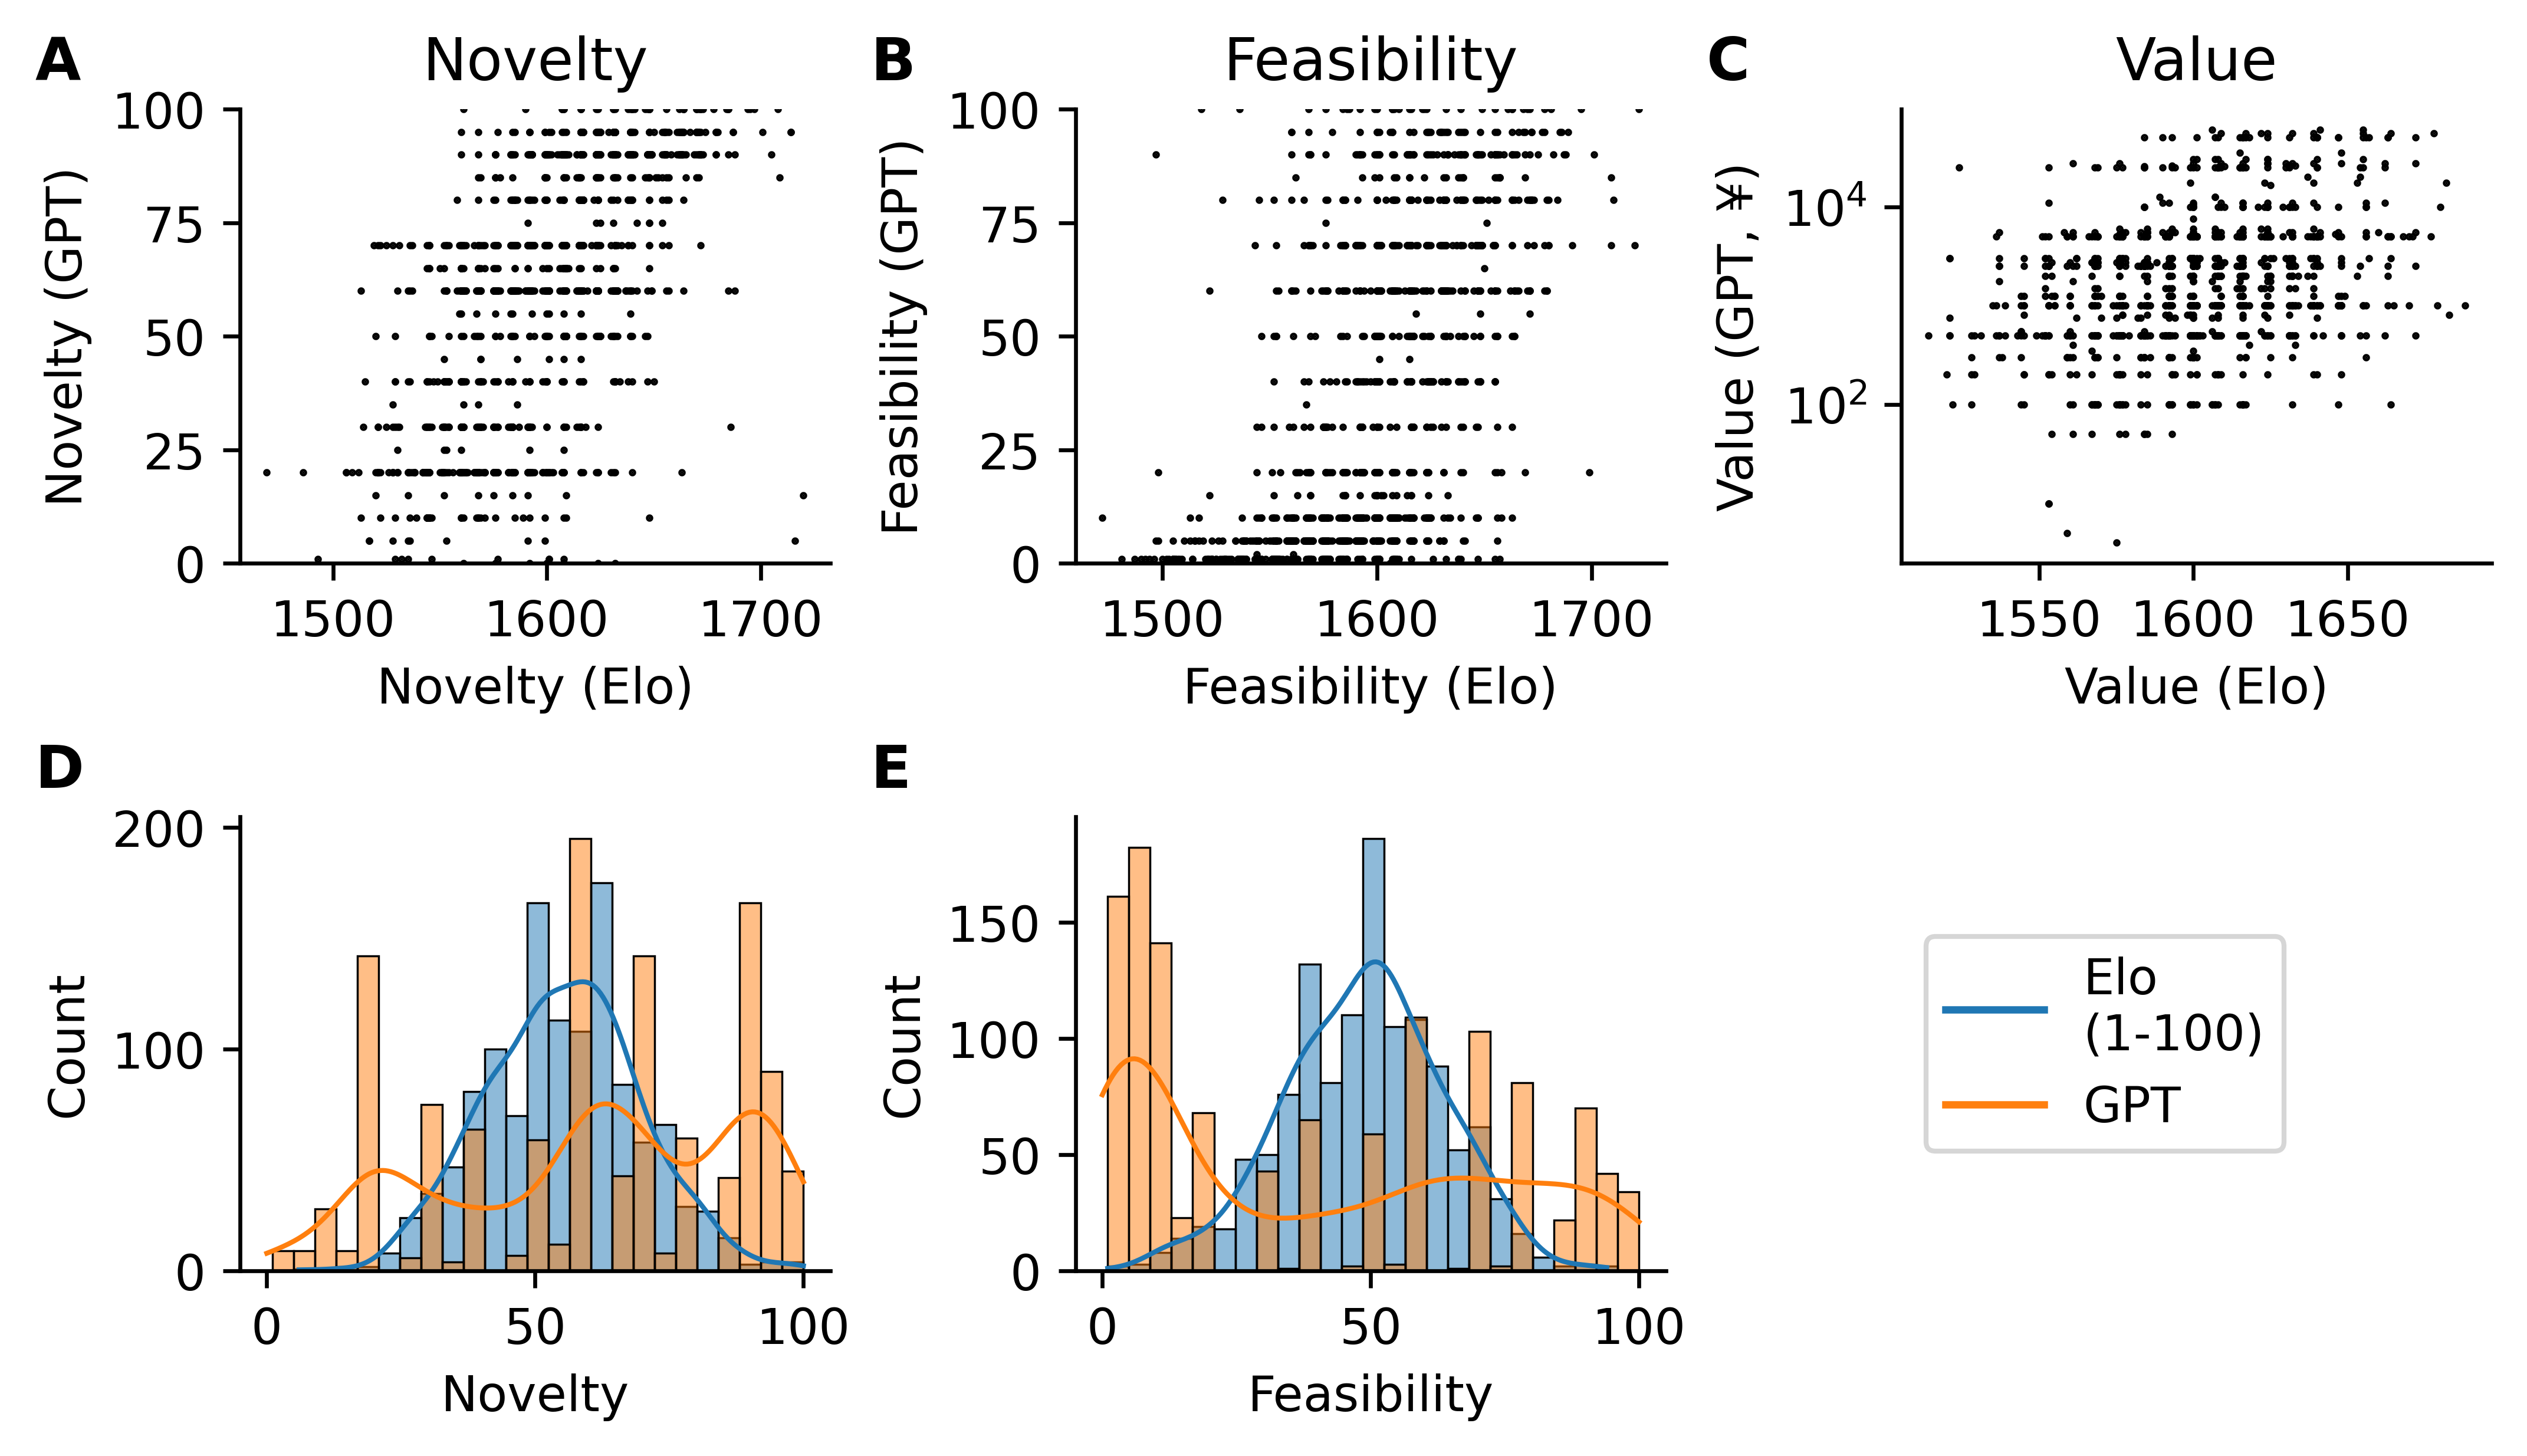

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(7,4), layout='constrained', dpi=600)
for measure, ax in zip(annotate.measures, axs.T):
    Measure = measure.capitalize()
    if measure == 'value':
        mask = (source['value']>0) & (source['value']<100000)
        suffix = ', ¥'
        ax[0].semilogy(source[mask][Measure], source[mask][measure], 'ok', ms=.5)
    else:
        suffix = ''
        ax[0].plot(source[Measure], source[measure], 'ok', ms=.5)
    ax[0].set_xlabel(f'{Measure} (Elo)')
    ax[0].set_ylabel(f'{Measure} (GPT{suffix})')
    ax[0].set_title(Measure)
    if measure != 'value':
        ax[0].set_ylim(0,100)

    if measure != 'value':
        sns.histplot(source, x=f'{measure}_transformed', ax=ax[1], kde=True, bins=25, binrange=(1,100), line_kws={'lw':1})
        sns.histplot(source, x=measure, ax=ax[1], kde=True, bins=25, binrange=(1,100), line_kws={'lw':1})
        ax[1].set_xlabel(Measure)

axs[1,2].plot([], label='Elo\n(1-100)')
axs[1,2].plot([], label='GPT')
axs[1,2].legend(loc='center left')
axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

sns.despine()
sns.despine(ax=axs[1,2], bottom=True, left=True)

for i, ax in enumerate(axs.flatten()):
    if i < 5:
        plot_utils.label_panel(ax, i)

plt.savefig(f'Figure_2.{fname}.pdf')

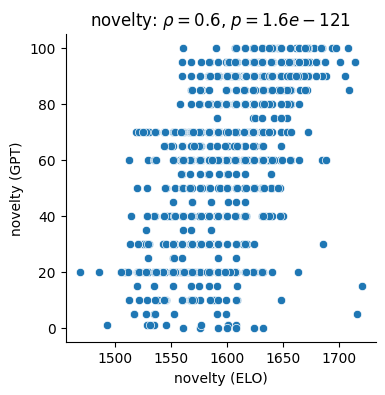

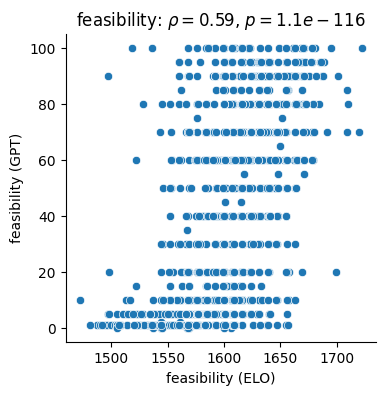

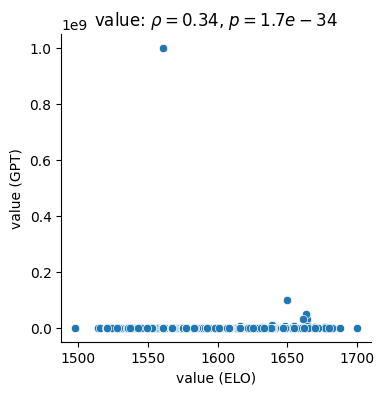

In [11]:
for key, c in corr.items():
    plt.figure(figsize=(4,4))
    sns.scatterplot(source, x=key.capitalize(), y=key)
    sns.despine()
    plt.xlabel(f'{key} (ELO)')
    plt.ylabel(f'{key} (GPT)')
    plt.title(f'{key}: $\\rho = {c.statistic:.2g}$, $p = {c.pvalue:.2g}$')

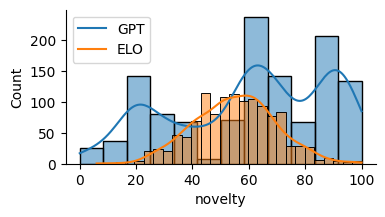

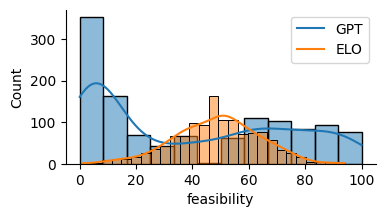

In [12]:
for key in ('novelty', 'feasibility'):
    fig, ax = plt.subplots(figsize=(4,2))
    sns.histplot(source, x=key, ax=ax, kde=True)
    sns.histplot(source, x=f'{key}_transformed', ax=ax, kde=True)
    sns.despine()
    plt.plot([], label='GPT')
    plt.plot([], label='ELO')
    plt.legend()

In [13]:
for idx, row in source[source['value']<0].iterrows():
    print(row['Question'], row['Answer'], row['value_explanation'], sep='\n', end='\n\n')

In [14]:
for idx, row in source[source['value'] > 100000].iterrows():
    print(row['Question'], row['Answer'], row['value'], row['value_idea_explanation'], row['value_explanation'], sep='\n', end='\n\n')

傘
船
500000
2. Idea: Using an umbrella as a boat
Existing products: Small boats can cost from 100,000 to 1,000,000 JPY.

傘
パラシュート
200000
3. Idea: Using an umbrella as a parachute
Existing products: Parachutes can cost from 100,000 to 300,000 JPY.

ストロー
家の建築
100000000
3. Idea: Use a straw for building a house.
Existing products: The cost of building materials for a house can range from millions to billions of yen.

ろうそく
乗り物
5000000
7. Idea: Using a candle as a vehicle
Existing products: Vehicles, which can range from 1,000,000 to 10,000,000 JPY depending on type and brand.

ろうそく
楽器
250000
15. Idea: Using a candle as a musical instrument
Existing products: Musical instruments, which can range from 5,000 to 500,000 JPY depending on type and quality.

新聞
エレベーター
1000000
12. Idea: Using a newspaper as an elevator.
Existing products: An elevator installation costs millions of JPY.

コルク
家の建築
30000000
20. Idea: Use cork for house construction.
Existing house construction costs can range from 10,

Text(0.5, 1.0, 'value: $\\rho = 0.32$, $p = 4.5e-27$')

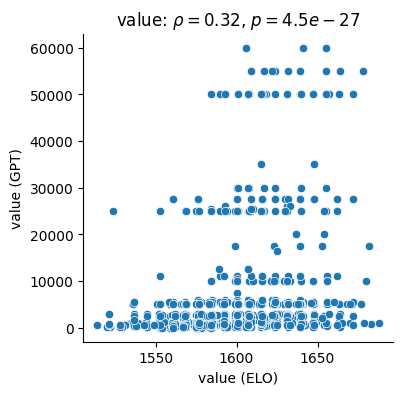

In [15]:
mask = (source['value']>0) & (source['value']<100000)
vcorr = stats.spearmanr(source[mask][['Value', 'value']])
plt.figure(figsize=(4,4))
sns.scatterplot(source[mask], x='Value', y='value')
sns.despine()
plt.xlabel(f'value (ELO)')
plt.ylabel(f'value (GPT)')
plt.title(f'value: $\\rho = {vcorr.statistic:.2g}$, $p = {vcorr.pvalue:.2g}$')

In [16]:
print(source[(source['Question']=='ボールペン')*(source['Answer']=='冷蔵庫')]['novelty_raw'].item())

23. Idea: Using a ballpoint pen as a refrigerator.
This is a highly novel idea, as pens are not typically used as refrigerators. It's unclear how this would work, but it's certainly unique.
{"novelty": 95}
